$$V_0= \mathbb{I} + v(s)  \psi_0(s)$$ 
$$v(s) = e^{i s} -1$$
$$\psi_0 = \frac{1}{2} \mathbb{I} + \alpha_X X + \frac{E_0}{2}Z$$
$$\alpha_X^2 = \frac{1}{4} - \frac{E_0^2}{4}$$

In [8]:
import numpy as np
from scipy.linalg import expm
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

In [34]:
E_0 = 0.8
p=0.3
s=0.2
alpha_X = np.sqrt(1/4 - E_0**2/4)
psi_0 = 1/2*I + alpha_X*X + E_0/2*Z

In [35]:
v = np.exp(1j*s)-1
psi_0_s = expm(-1j*s*Z)@psi_0@expm(1j*s*Z)
V_0 = I + v*psi_0_s

In [36]:
psi_1 = V_0 @ psi_0 @ V_0.conj().T
psi_1

array([[0.9136992+1.36577012e-17j, 0.2808037+1.50130822e-03j],
       [0.2808037-1.50130822e-03j, 0.0863008-3.43800105e-19j]])

In [37]:
rho_0 = (1-p)*psi_0 +p*I/2
rho_0

array([[0.78+0.j, 0.21+0.j],
       [0.21+0.j, 0.22+0.j]])

In [40]:
V_0m = np.exp(1j*s) * V_0
rho_1 = V_0m @ rho_0 @ V_0m.conj().T
rho_1

array([[0.78958944-1.73450202e-17j, 0.19656259+1.05091575e-03j],
       [0.19656259-1.05091575e-03j, 0.21041056+2.85467938e-18j]])

In [41]:
(1-p)*psi_1 + p/2*I

array([[0.78958944+9.56039085e-18j, 0.19656259+1.05091575e-03j],
       [0.19656259-1.05091575e-03j, 0.21041056-2.40660073e-19j]])

In [32]:
def delta_E_1(E_0, s):
    return  np.sin(s)**2 *(1-E_0**2)*((1-np.cos(s))*E_0 - np.cos(s))

In [47]:
E_0 = 0.8
p=0.3
E_1_list = []
E_1_mix_list = []
s_list = np.linspace(0,np.pi/4*1.2,30)
alpha_X = np.sqrt(1/4 - E_0**2/4)
psi_0 = 1/2*I + alpha_X*X + E_0/2*Z
for s in s_list:
    E_1_list.append(delta_E_1(E_0, s))
for s in s_list:
    E_1_mix_list.append((1-p)*(delta_E_1(E_0, s)))

In [48]:
delta_E_1_def = []
delta_E_1_mix_def = []
for s in s_list:
    v = np.exp(1j*s)-1
    psi_0_s = expm(-1j*s*Z)@psi_0@expm(1j*s*Z)
    V_0 = I + v*psi_0_s
    psi_1 = V_0 @ psi_0 @ V_0.conj().T
    delta_E_1_def.append(np.real((psi_1-psi_0)[1][1]))

rho_0 = 1/2*I + (1-p)*alpha_X*X + (1-p)*E_0/2*Z
for s in s_list:
    v = np.exp(1j*s)-1
    psi_0_s = expm(-1j*s*Z)@psi_0@expm(1j*s*Z)
    V_0 = np.exp(1j*s) * (I + v*psi_0_s)
    rho_1 = V_0 @ rho_0 @ V_0.conj().T
    delta_E_1_mix_def.append(np.real((rho_1-rho_0)[1][1]))

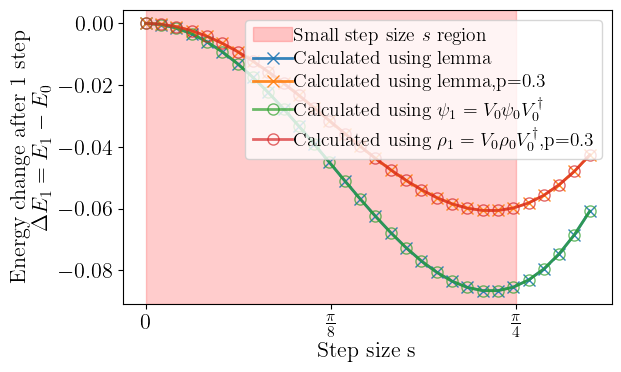

In [49]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# Plot config
plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'font.size': 16,
    'savefig.dpi': 75,
    'lines.linewidth': 2.0,
    'lines.markersize': 8,
    'legend.fontsize': 14,
    'legend.labelspacing': .3,
    'legend.columnspacing': .3,
    'legend.handletextpad': .1,
    'text.usetex': True,
    'font.family': "serif",
    'font.serif': "cm",
    'figure.figsize': [5, 3.5],
    'figure.autolayout': True
})
plt.figure(figsize=[6.5,4])

plt.axvspan(0, np.pi/4, alpha=0.2, color='red',label=r'Small step size $s$ region')
plt.plot(s_list,E_1_list,marker='x',alpha=0.9,label='Calculated using lemma')
plt.plot(s_list,E_1_mix_list,marker='x',alpha=0.9,label='Calculated using lemma,p=0.3')
plt.plot(s_list,delta_E_1_def,marker='o',markerfacecolor='none',alpha=0.7,label=r'Calculated using $\psi_1 = V_0 \psi_0 V_0^\dagger$')
plt.plot(s_list,delta_E_1_mix_def,marker='o',markerfacecolor='none',alpha=0.7,label=r'Calculated using $\rho_1 = V_0 \rho_0 V_0^\dagger$,p=0.3')


plt.xlabel('Step size s')
plt.ylabel('Energy change after 1 step\n' + r'$\Delta E_1 = E_1-E_0$')


# Custom formatter
def pi_formatter(x, pos):
    fractions = {
        0: "0",
        np.pi/8: r"$\frac{\pi}{8}$",
        np.pi/4: r"$\frac{\pi}{4}$"
    }
    for key in fractions:
        if np.isclose(x, key):
            return fractions[key]
    return ""

# Set ticks
xticks = [0, np.pi/8, np.pi/4]
plt.legend(loc='upper right')
plt.xticks(xticks)
plt.gca().xaxis.set_major_formatter(FuncFormatter(pi_formatter))
plt.savefig('plots/energy_change.pdf', bbox_inches='tight')
plt.show()